In [1]:
import pandas as pd

file_path = r"C:\Users\Samuel\Downloads\Customer Segmentation.csv" 
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,460394,Female,No,32,Yes,Healthcare,9.0,Low,3.0,Cat_6,D
1,1,461798,Female,No,56,Yes,Artist,0.0,Low,1.0,Cat_6,A
2,2,464976,Male,Yes,75,No,Lawyer,1.0,Low,1.0,Cat_4,D
3,3,462104,Male,Yes,39,No,Entertainment,9.0,Low,2.0,Cat_3,D
4,4,464829,Male,No,22,No,Healthcare,9.0,Low,5.0,Cat_4,D


In [ ]:
#Dropping unneccessary columns
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

In [7]:
#Handling mising values
print(df.isnull().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)


Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64


In [11]:
#converting categorical variables into numeric form
from sklearn.preprocessing import LabelEncoder

# Encoding binary categorical features
df = df.map(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Encoding categorical variables
encoder = LabelEncoder()

for col in ['Gender', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']:
    df[col] = encoder.fit_transform(df[col])


In [15]:
#Selecting relevant features for clustering.
X = df[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score']]

In [17]:
#standardize the features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

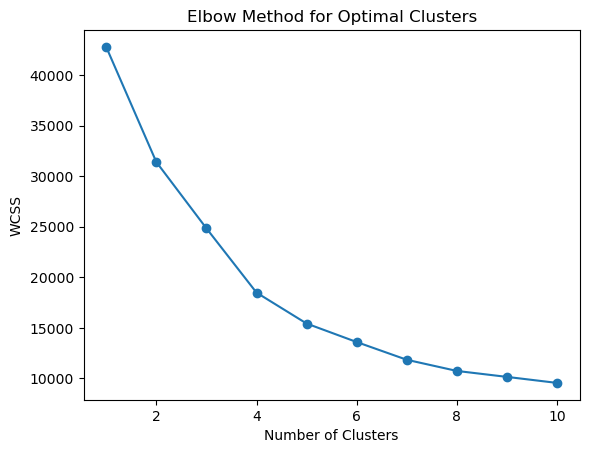

In [19]:
#using the Elbow Method to determine the best number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [21]:
# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View the first few rows with cluster labels
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Cluster
0,0,0.0,32,1.0,5,9.0,2,3.0,5,3,1
1,0,0.0,56,1.0,0,0.0,2,1.0,5,0,3
2,1,1.0,75,0.0,7,1.0,2,1.0,3,3,3
3,1,1.0,39,0.0,3,9.0,2,2.0,2,3,1
4,1,0.0,22,0.0,5,9.0,2,5.0,3,3,1


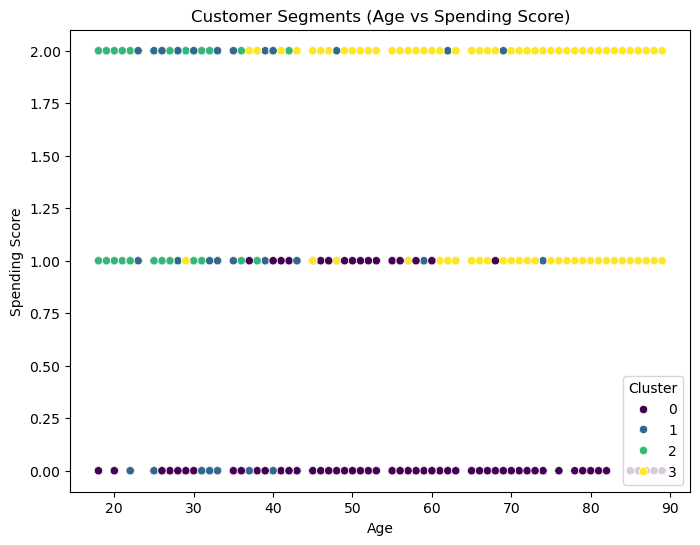

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segments (Age vs Spending Score)")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

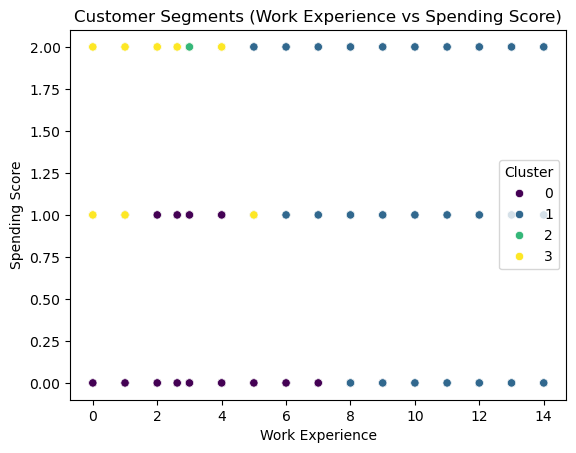

In [25]:
sns.scatterplot(x=df['Work_Experience'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segments (Work Experience vs Spending Score)")
plt.xlabel("Work Experience")
plt.ylabel("Spending Score")
plt.show()

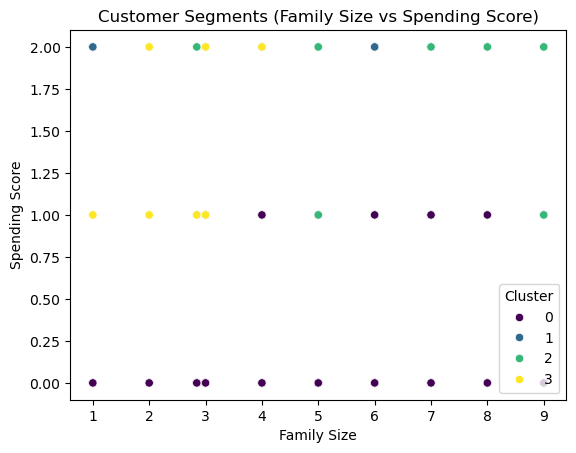

In [27]:
sns.scatterplot(x=df['Family_Size'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Segments (Family Size vs Spending Score)")
plt.xlabel("Family Size")
plt.ylabel("Spending Score")
plt.show()